<a href="https://colab.research.google.com/github/peronvidal/guias-iia-lcd-unsam/blob/dev/plantilla%20para%20bicis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

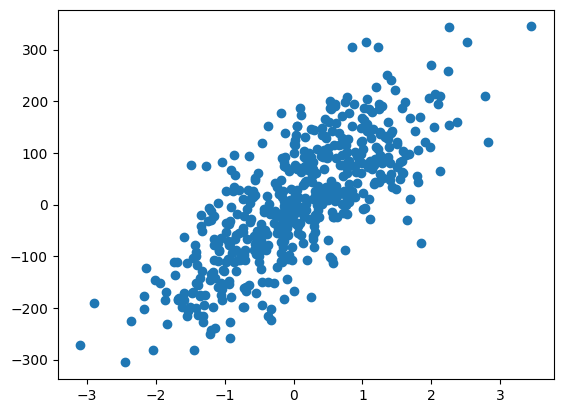

In [10]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=500, n_features=1, noise=80)
# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60
                                                    , random_state=1
                                                    )

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=60)

print('full dataset', X.shape, y.shape,
      'train dataset', X_train.shape, y_train.shape,
      'test dataset', X_test.shape, y_test.shape,
      'val dataset', X_val.shape, y_val.shape)

full dataset (500, 1) (500,) train dataset (380, 1) (380,) test dataset (60, 1) (60,) val dataset (60, 1) (60,)


In [27]:
# Tu turno...

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import numpy as np

# funcion para armar pipeline, recibe una instancia de modelo como input
from sklearn.pipeline import Pipeline, make_pipeline
def classifier_pipe(model):
    return make_pipeline(
        # PolynomialFeatures(degree=3),
        # StandardScaler(),
        model
    )

# entrenamiento de modelos 
lasso = classifier_pipe(Lasso()).fit(X_train, y_train)
ridge = classifier_pipe(Ridge()).fit(X_train, y_train)
elastic = classifier_pipe(ElasticNet()).fit(X_train, y_train)



def get_model_scores(model, modelName, X_train, y_train, X_test, y_test, X_val, y_val):
    print(f'scores for {modelName}')
    print(f'mean squared error on train set for {modelName},{np.sqrt(mean_squared_error(y_train, model.predict(X_train)))}')
    # print(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    print(model.score(X_train,y_train))
    print(f'r2 score on train set for {modelName}:{r2_score(y_train, model.predict(X_train))}')
    # print(r2_score(y_train, model.predict(X_train)))
    print(f'mean squared error on test set for {modelName}:{np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')
    # print(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print(f'r2 score on test set for {modelName}:{r2_score(y_test, model.predict(X_test))}')
    # print(r2_score(y_test, model.predict(X_test)))
    print(f'mean squared error on validation set for {modelName}:{np.sqrt(mean_squared_error(y_val, model.predict(X_val)))}')
    # print(np.sqrt(mean_squared_error(y_val, model.predict(X_val))))
    print(f'r2 score on validation set for {modelName},{r2_score(y_val, model.predict(X_val))}')
    # print(r2_score(y_val, model.predict(X_val)))
    print('-'*100)


get_model_scores(lasso, 'lasso', X_train, y_train,
                 X_test, y_test, X_val, y_val)
get_model_scores(ridge, 'ridge', X_train, y_train,
                 X_test, y_test, X_val, y_val)
get_model_scores(elastic, 'elastic', X_train, y_train,
                 X_test, y_test, X_val, y_val)

scores for lasso
mean squared error on train set for lasso,77.67721155003944
0.58567119461212
r2 score on train set for lasso:0.58567119461212
mean squared error on test set for lasso:71.85628861201276
r2 score on test set for lasso:0.6567779171531707
mean squared error on validation set for lasso:82.63511396163038
r2 score on validation set for lasso,0.43005135394648475
----------------------------------------------------------------------------------------------------
scores for ridge
mean squared error on train set for ridge,77.67145366327868
0.585732617257864
r2 score on train set for ridge:0.585732617257864
mean squared error on test set for ridge:71.80762225298199
r2 score on test set for ridge:0.6572426701499965
mean squared error on validation set for ridge:82.66104053660177
r2 score on validation set for ridge,0.4296936577156911
----------------------------------------------------------------------------------------------------
scores for elastic
mean squared error on train se

In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# X, y = make_regression(n_samples=200, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    #  random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(300,200,100,1)).fit(X_train, y_train)
# regr.predict(X_test[:2])
print('train score: ',regr.score(X_train, y_train))
print('val score: ',regr.score(X_val, y_val))
print('test score: ',regr.score(X_test, y_test))


train score:  0.6051268074398607
val score:  0.3704206109374262
test score:  0.6448397591185397


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
